# Applied Data Science Capstone Notebook

# 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1,2,5,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
0,1999,1,1,20,2,02,34,UU,1,5,...,06,1990,01,M,41,11,1,UU,1,752
1,1999,1,1,20,2,02,34,UU,1,5,...,01,1987,01,M,19,11,1,UU,1,752
2,1999,1,1,20,2,02,34,UU,1,5,...,01,1987,02,F,20,13,2,02,2,752
3,1999,1,1,08,2,01,01,UU,5,3,...,01,1986,01,M,46,11,1,UU,1,753
4,1999,1,1,08,2,01,01,UU,5,3,...,NN,NNNN,01,M,05,99,2,UU,3,753


In [3]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot']) # optional: for ggplot-like style

In [70]:
from sklearn.model_selection import train_test_split
import itertools
from sklearn import preprocessing

In [71]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [72]:
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix

# 2. Data cleaning, first step

In [5]:
df.head(10)

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
0,1999,1,1,20,2,02,34,UU,1,5,...,06,1990,01,M,41,11,1,UU,1,752
1,1999,1,1,20,2,02,34,UU,1,5,...,01,1987,01,M,19,11,1,UU,1,752
2,1999,1,1,20,2,02,34,UU,1,5,...,01,1987,02,F,20,13,2,02,2,752
3,1999,1,1,08,2,01,01,UU,5,3,...,01,1986,01,M,46,11,1,UU,1,753
4,1999,1,1,08,2,01,01,UU,5,3,...,NN,NNNN,01,M,05,99,2,UU,3,753
5,1999,1,1,17,2,03,QQ,QQ,1,2,...,01,1984,01,M,28,11,1,UU,1,820
6,1999,1,1,17,2,03,QQ,QQ,1,2,...,01,1991,01,M,21,11,1,UU,1,820
7,1999,1,1,17,2,03,QQ,QQ,1,2,...,01,1991,02,F,UU,13,2,UU,2,820
8,1999,1,1,17,2,03,QQ,QQ,1,2,...,01,1992,01,M,UU,11,2,UU,1,820
9,1999,1,1,15,2,01,04,UU,1,5,...,01,1997,01,M,61,11,1,UU,1,932


In [6]:
df=df.drop(['V_ID', 'V_TYPE', 'V_YEAR', 'P_ID', 'P_SEX', 'P_PSN', 'P_ISEV', 'P_SAFE', 'P_AGE', 'P_USER'], axis=1)
df.head(10)

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,C_CASE
0,1999,1,1,20,2,02,34,UU,1,5,3,03,752
1,1999,1,1,20,2,02,34,UU,1,5,3,03,752
2,1999,1,1,20,2,02,34,UU,1,5,3,03,752
3,1999,1,1,08,2,01,01,UU,5,3,6,18,753
4,1999,1,1,08,2,01,01,UU,5,3,6,18,753
5,1999,1,1,17,2,03,QQ,QQ,1,2,1,01,820
6,1999,1,1,17,2,03,QQ,QQ,1,2,1,01,820
7,1999,1,1,17,2,03,QQ,QQ,1,2,1,01,820
8,1999,1,1,17,2,03,QQ,QQ,1,2,1,01,820
9,1999,1,1,15,2,01,04,UU,1,5,U,UU,932


In [7]:
df.shape

(6772563, 13)

In [8]:
indexNames = df[(df['C_VEHS'] == 'UU')|(df['C_VEHS'] == 'XX')|(df['C_HOUR'] == 'UU')|(df['C_HOUR'] == 'XX')|(df['C_MNTH'] == 'UU')|(df['C_MNTH'] == 'XX')|(df['C_WDAY'] == 'X')|(df['C_WDAY'] == 'U')].index
df.drop(indexNames, inplace=True)
df.shape

(6705062, 13)

In [9]:
df.groupby(['C_SEV']).size()

C_SEV
1     111302
2    6593760
dtype: int64

In [10]:
df['C_MNTH'] = df['C_MNTH'].astype(int)
df['C_WDAY'] = df['C_WDAY'].astype(int)
df['C_HOUR'] = df['C_HOUR'].astype(int)
df['C_VEHS'] = df['C_VEHS'].astype(int)
df['C_YEAR'] = df['C_YEAR'].astype(int)

In [11]:
df.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,C_CASE
0,1999,1,1,20,2,2,34,UU,1,5,3,03,752
1,1999,1,1,20,2,2,34,UU,1,5,3,03,752
2,1999,1,1,20,2,2,34,UU,1,5,3,03,752
3,1999,1,1,8,2,1,01,UU,5,3,6,18,753
4,1999,1,1,8,2,1,01,UU,5,3,6,18,753


In [12]:
df_small = df.drop(['C_RALN', 'C_TRAF', 'C_CONF', 'C_CASE'], axis=1)
df_small.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_RCFG,C_WTHR,C_RSUR
0,1999,1,1,20,2,2,UU,1,5
1,1999,1,1,20,2,2,UU,1,5
2,1999,1,1,20,2,2,UU,1,5
3,1999,1,1,8,2,1,UU,5,3
4,1999,1,1,8,2,1,UU,5,3


In [13]:
df_small = df_small.rename(columns={'C_YEAR':'Year', 'C_MNTH':'Month', 'C_WDAY':'Weekday', 'C_HOUR':'Hour', 'C_SEV':'Fatal', 'C_VEHS':'Nbr Vehicles', 'C_WTHR':'Weather', 'C_RSUR':'Road Surface', 'C_RCFG':'Intersection'})
df_small.head()

,Year,Month,Weekday,Hour,Fatal,Nbr Vehicles,Intersection,Weather,Road Surface
0,1999,1,1,20,2,2,UU,1,5
1,1999,1,1,20,2,2,UU,1,5
2,1999,1,1,20,2,2,UU,1,5
3,1999,1,1,8,2,1,UU,5,3
4,1999,1,1,8,2,1,UU,5,3


In [14]:
df_small['Fatal'] = df_small['Fatal'].apply(lambda x: 0 if x==2 else 1)
df_small['Intersection'] = df_small['Intersection'].apply(lambda x: 1 if (x == '02') | (x == '03') | (x == '04') else 0)
dict1 = {'1': 'Clear', '2': 'Cloudy', '3': 'Raining', '4': 'Snowing', '5': 'Hail', '6': 'Fog', '7': 'Stormy', 'Q': 'Unknown', 'U': 'Unknown', 'X': 'Unknown'}
df_small['Weather'] = df_small['Weather'].map(dict1)
dict2 = {'1': 'normal', '2': 'wet', '3': 'snow', '4': 'snow', '5': 'snow', '6': 'other', '7': 'other', '8': 'other', '9': 'wet', 'Q': 'other', 'U': 'other', 'X': 'other'}
df_small['Road Surface'] = df_small['Road Surface'].map(dict2)
df_small.head(10)

,Year,Month,Weekday,Hour,Fatal,Nbr Vehicles,Intersection,Weather,Road Surface
0,1999,1,1,20,0,2,0,Clear,snow
1,1999,1,1,20,0,2,0,Clear,snow
2,1999,1,1,20,0,2,0,Clear,snow
3,1999,1,1,8,0,1,0,Hail,snow
4,1999,1,1,8,0,1,0,Hail,snow
5,1999,1,1,17,0,3,0,Clear,wet
6,1999,1,1,17,0,3,0,Clear,wet
7,1999,1,1,17,0,3,0,Clear,wet
8,1999,1,1,17,0,3,0,Clear,wet
9,1999,1,1,15,0,1,0,Clear,snow


# 3. Data exploration and visualization

In [49]:
df_fatal = df_small[df_small['Fatal']==1]
df_fatal.head()

,Year,Month,Weekday,Hour,Fatal,Nbr Vehicles,Intersection,Weather,Road Surface
50,1999,1,1,23,1,1,0,Clear,normal
163,1999,1,1,12,1,1,1,Clear,normal
164,1999,1,1,12,1,1,1,Clear,normal
280,1999,1,1,15,1,1,1,Raining,wet
281,1999,1,1,15,1,1,1,Raining,wet


In [50]:
df_fatal.shape

(111302, 9)

In [54]:
df_year = df_small['Year'].value_counts().to_frame()
df_year.rename(columns={'Year':'Count'},  inplace=True)
df_year = df_year.rename_axis('Year').reset_index()
df_year.head()

,Year,Count
0,2000,417921
1,2002,415568
2,1999,408966
3,2001,405182
4,2003,402789


In [55]:
df_fyear = df_fatal['Year'].value_counts().to_frame()
df_fyear.rename(columns={'Year':'Count'},  inplace=True)
df_fyear = df_fyear.rename_axis('Year').reset_index()
df_fyear.head()

,Year,Count
0,1999,7511
1,2002,7031
2,2000,6934
3,2005,6907
4,2004,6875


In [56]:
regr = linear_model.LinearRegression()
x = np.asanyarray(df_year[['Year']])
y = np.asanyarray(df_year[['Count']])
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
regrf = linear_model.LinearRegression()
x = np.asanyarray(df_fyear[['Year']])
y = np.asanyarray(df_fyear[['Count']])
regrf.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

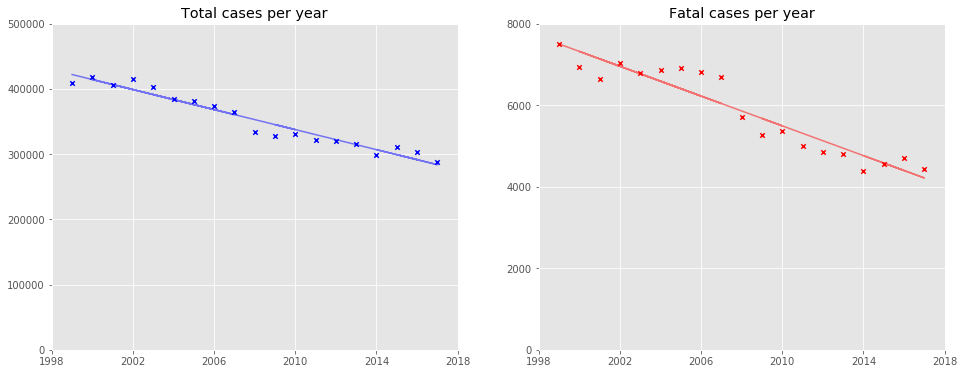

In [76]:
fig1 = plt.figure(figsize=(16,6))
years = np.arange(1998, 2022, step=4)
ax1 = fig1.add_subplot(1, 2, 1)
df_year.plot.scatter(x='Year', y='Count', marker='x', color='blue', ax=ax1)
ax1.plot(x, regr.coef_[0][0]*x + regr.intercept_[0], 'blue', alpha=0.5)
ax1.set_xticks(years)
ax1.set_yticks(np.arange(0, 600000, step=100000))
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_title('Total cases per year')
ax2 = fig1.add_subplot(1, 2, 2)
df_fyear.plot.scatter(x='Year', y='Count', marker='x', color='red', ax=ax2)
ax2.plot(x, regrf.coef_[0][0]*x + regrf.intercept_[0], 'red', alpha=0.5)
ax2.set_xticks(years)
ax2.set_yticks(np.arange(0, 10000, step=2000))
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('Fatal cases per year')
fig1.show()

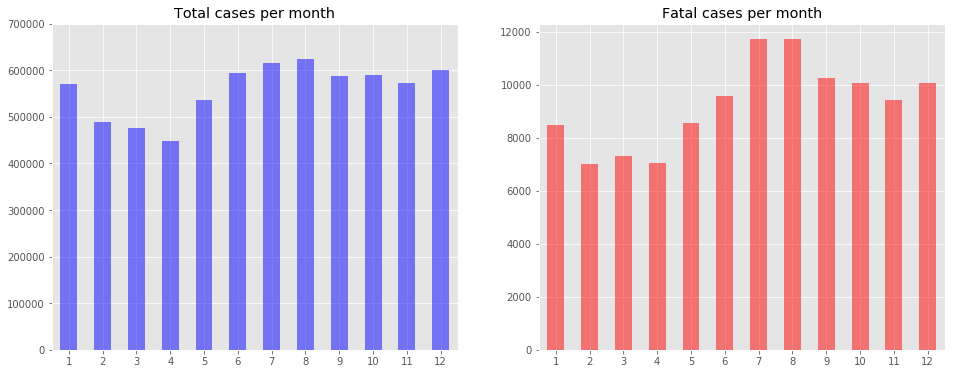

In [105]:
fig2 = plt.figure(figsize=(16,6))
ax1 = fig2.add_subplot(1, 2, 1)
months = np.arange(1, 13, step=1)
df_small.groupby(['Month']).size().plot(kind='bar', color='blue', alpha=0.5, ax=ax1)
ax1.set_xticklabels(months, rotation=0)
ax1.set_yticks(np.arange(0, 800000, step=100000))
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_title('Total cases per month')
ax2 = fig2.add_subplot(1, 2, 2)
df_fatal.groupby(['Month']).size().plot(kind='bar', color='red', alpha=0.5, ax=ax2)
ax2.set_xticklabels(months, rotation=0)
ax2.set_yticks(np.arange(0, 14000, step=2000))
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('Fatal cases per month')
fig2.show()

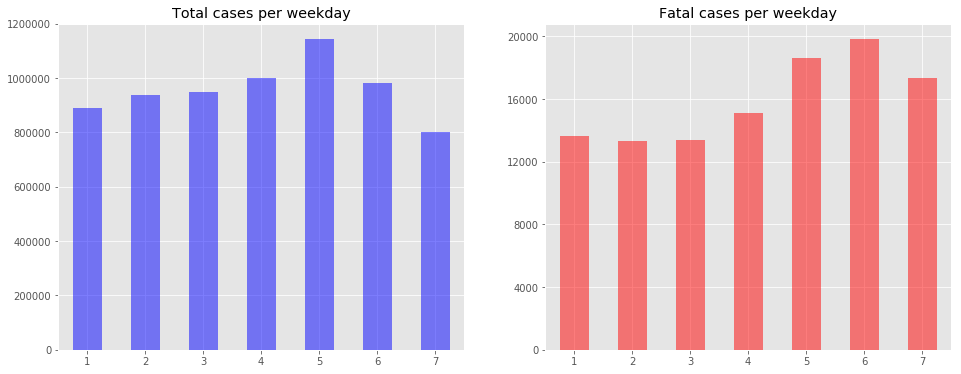

In [104]:
fig3 = plt.figure(figsize=(16,6))
ax1 = fig3.add_subplot(1, 2, 1)
days = np.arange(1, 8, step=1)
df_small.groupby(['Weekday']).size().plot(kind='bar', color='blue', alpha=0.5, ax=ax1)
ax1.set_xticklabels(months, rotation=0)
ax1.set_yticks(np.arange(0, 1400000, step=200000))
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_title('Total cases per weekday')
ax2 = fig3.add_subplot(1, 2, 2)
df_fatal.groupby(['Weekday']).size().plot(kind='bar', color='red', alpha=0.5, ax=ax2)
ax2.set_xticklabels(months, rotation=0)
ax2.set_yticks(np.arange(0, 24000, step=4000))
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('Fatal cases per weekday')
fig3.show()

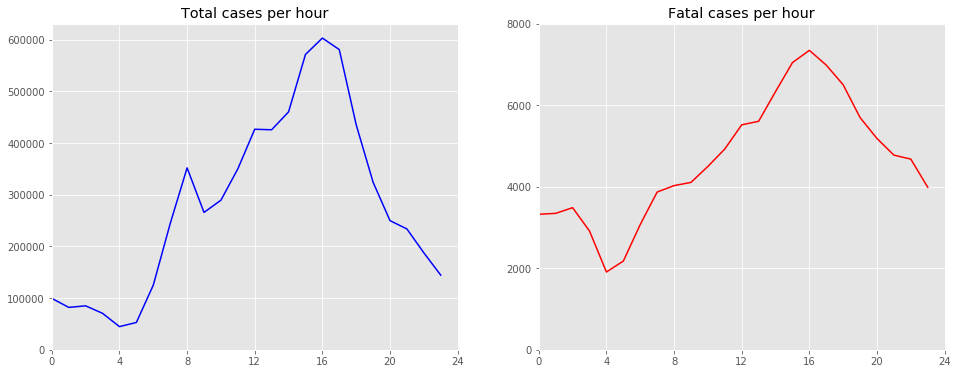

In [111]:
fig4 = plt.figure(figsize=(16,6))
ax1 = fig4.add_subplot(1, 2, 1)
hours = np.arange(0, 28, step=4)
df_small.groupby(['Hour']).size().plot(color='blue', ax=ax1)
ax1.set_xticks(hours)
ax1.set_yticks(np.arange(0, 700000, step=100000))
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_title('Total cases per hour')
ax2 = fig4.add_subplot(1, 2, 2)
df_fatal.groupby(['Hour']).size().plot(color='red', ax=ax2)
ax2.set_xticks(hours)
ax2.set_yticks(np.arange(0, 10000, step=2000))
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('Fatal cases per hour')
fig4.show()

In [166]:
df_weather = df_small
dict3 = {'Clear':'clear', 'Cloudy': 'cloudy', 'Raining': 'raining', 'Snowing':'snowing', 'Hail':'other', 'Fog':'other', 'Stormy':'other', 'Unknown':'other'}
df_weather['Weather'] = df_weather['Weather'].map(dict3)
df_weather = df_weather['Weather'].value_counts().to_frame()
df_weather.rename(columns={'Weather':'Count'},  inplace=True)
df_weather = df_weather.rename_axis('Weather').reset_index()
df_weather.head()

,Weather,Count
0,clear,4689734
1,cloudy,676776
2,raining,675544
3,snowing,402602
4,other,260406


In [167]:
df_surface = df_small['Road Surface'].value_counts().to_frame()
df_surface.rename(columns={'Road Surface':'Count'},  inplace=True)
df_surface = df_surface.rename_axis('Road Surface').reset_index()
df_surface.head()


,Road Surface,Count
0,normal,4429957
1,wet,1218853
2,snow,745597
3,other,310655


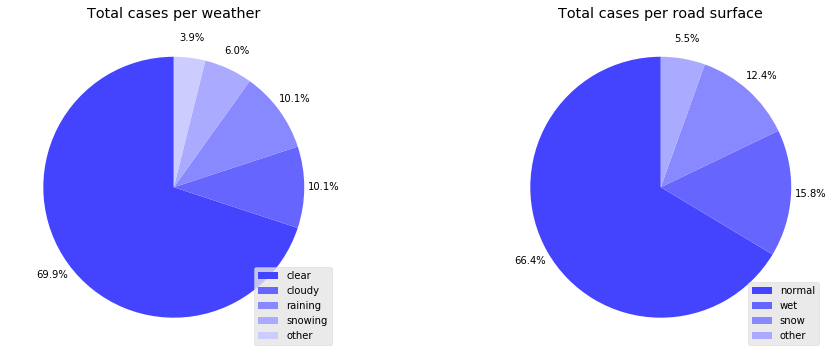

In [168]:
fig5 = plt.figure(figsize=(16,6))
ax1 = fig5.add_subplot(1, 2, 1)
df_weather.plot(x='Weather', y='Count', kind='pie', colors=['#4444ff', '#6666ff', '#8888ff', '#aaaaff', '#ccccff'], autopct='%1.1f%%', startangle=90, labels=None, pctdistance=1.15, ax=ax1)
ax1.set_ylabel('')
ax1.set_title('Total cases per weather')
ax1.legend(labels=df_weather['Weather'], loc='lower right')
ax2 = fig5.add_subplot(1, 2, 2)
df_fsurface.plot(x='Road Surface', y='Count', kind='pie', colors=['#4444ff', '#6666ff', '#8888ff', '#aaaaff'], autopct='%1.1f%%', startangle=90, labels=None, pctdistance=1.15, ax=ax2)
ax2.set_ylabel('')
ax2.set_title('Total cases per road surface')
ax2.legend(labels=df_surface['Road Surface'], loc='lower right') 
fig5.show()

# 4. Data cleaning, second step

In [38]:
df1 = df_small[df_small['Fatal'] == 1]
df0 = df_small[df_small['Fatal'] == 0]
df_cat = pd.concat([df0.sample(frac =.002), df1.sample(frac=.1)], axis=0)
df_cat.shape

(24318, 9)

In [39]:
df_weather = pd.get_dummies(df_cat['Weather'])
df_surface = pd.get_dummies(df_cat['Road Surface'])
df_cat = pd.concat([df_cat, df_weather, df_surface], axis=1)
df_cat.drop(["Weather", "Road Surface"], axis = 1, inplace=True)
df_cat.head(10)

,Year,Month,Weekday,Hour,Fatal,Nbr Vehicles,Intersection,Clear,Cloudy,Fog,Hail,Raining,Snowing,Stormy,Unknown,normal,other,snow,wet
2610316,2005,6,2,17,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
4346196,2010,4,4,9,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0
624422,2000,7,4,7,0,3,1,1,0,0,0,0,0,0,0,1,0,0,0
3668039,2008,3,5,10,0,3,1,0,1,0,0,0,0,0,0,1,0,0,0
2062666,2003,12,5,12,0,3,1,1,0,0,0,0,0,0,0,1,0,0,0
6073014,2015,9,2,16,0,2,1,1,0,0,0,0,0,0,0,1,0,0,0
5521204,2013,11,4,10,0,2,1,1,0,0,0,0,0,0,0,1,0,0,0
3057329,2006,7,7,2,0,2,0,1,0,0,0,0,0,0,0,1,0,0,0
4630273,2011,2,2,7,0,11,0,0,0,0,0,0,1,0,0,0,0,1,0
826725,2000,12,6,16,0,2,1,1,0,0,0,0,0,0,0,1,0,0,0


In [40]:
df_cat.groupby(['Fatal']).size()

Fatal
0    13188
1    11130
dtype: int64

In [41]:
df_cat.to_csv('cleaned_data.csv')

# 5. Preparing Classification

In [42]:
X = df_cat
X['h2'] = X['Hour']*X['Hour']
X['h3'] = X['Hour']*X['h2']
X['m2'] = X['Month']*X['Month']
X['m3'] = X['Month']*X['m2']
X['d2'] = X['Weekday']*X['Weekday']
X['d3'] = X['Weekday']*X['d2']
X.head()

,Year,Month,Weekday,Hour,Fatal,Nbr Vehicles,Intersection,Clear,Cloudy,Fog,...,normal,other,snow,wet,h2,h3,m2,m3,d2,d3
2610316,2005,6,2,17,0,1,0,0,0,0,...,0,0,0,1,289,4913,36,216,4,8
4346196,2010,4,4,9,0,1,1,0,0,0,...,0,1,0,0,81,729,16,64,16,64
624422,2000,7,4,7,0,3,1,1,0,0,...,1,0,0,0,49,343,49,343,16,64
3668039,2008,3,5,10,0,3,1,0,1,0,...,1,0,0,0,100,1000,9,27,25,125
2062666,2003,12,5,12,0,3,1,1,0,0,...,1,0,0,0,144,1728,144,1728,25,125


In [43]:
y = X['Fatal']
y.head()

2610316    0
4346196    0
624422     0
3668039    0
2062666    0
Name: Fatal, dtype: int64

In [44]:
X.drop(['Fatal'], axis=1, inplace=True)
X.shape

(24318, 24)

In [45]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train, X_eval, y_train, y_eval = train_test_split(X_t, y_t, test_size=0.25, random_state=6)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Evaluation set:', X_eval.shape,  y_eval.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (14590, 24) (14590,)
Evaluation set: (4864, 24) (4864,)
Test set: (4864, 24) (4864,)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [46]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix'):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    fmt = '.2f'
    thresh = (cm.min() + cm.max()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, https://eu-de.dataplatform.cloud.ibm.com/data/jupyter2/runtimeenv1/v1/wdpx/service/notebook/conda2py36dd00f06536834845a363fd931e3fccf1/dsxjpy/ySlmsicWCArQRLRppDCqcA:6cBsjXhsO2DTlI7qoxVteucF8486qIlJx5MWdjeSDSf1op70F4WCFVCASZ100oT-Ov13YXY/container/notebooks/fec2f142-6a95-4ac8-8e72-437d3f771ea2?api=v2&project=dd00f065-3683-4845-a363-fd931e3fccf1#6.-Doing-the-classificationj] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# 6. KNN Algorithm

In [47]:
Ks = 20
mean_acc = np.zeros(Ks-1)
for n in range(1,Ks):
    print('Training with k =', n)
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = neigh.predict(X_eval)
    mean_acc[n-1] = metrics.accuracy_score(y_eval, yhat)
mean_acc

Training with k = 1
Training with k = 2
Training with k = 3
Training with k = 4
Training with k = 5
Training with k = 6
Training with k = 7
Training with k = 8
Training with k = 9
Training with k = 10
Training with k = 11
Training with k = 12
Training with k = 13
Training with k = 14
Training with k = 15
Training with k = 16
Training with k = 17
Training with k = 18
Training with k = 19


array([0.59, 0.58, 0.58, 0.59, 0.58, 0.59, 0.59, 0.6 , 0.6 , 0.6 , 0.59,
       0.59, 0.59, 0.6 , 0.6 , 0.6 , 0.6 , 0.6 , 0.6 ])

In [48]:
neigh = KNeighborsClassifier(n_neighbors = 9).fit(X_train,y_train)
yhat=neigh.predict(X_eval)

              precision    recall  f1-score   support

           0       0.54      0.60      0.57      2627
           1       0.46      0.40      0.43      2237

   micro avg       0.51      0.51      0.51      4864
   macro avg       0.50      0.50      0.50      4864
weighted avg       0.50      0.51      0.50      4864

Normalized confusion matrix


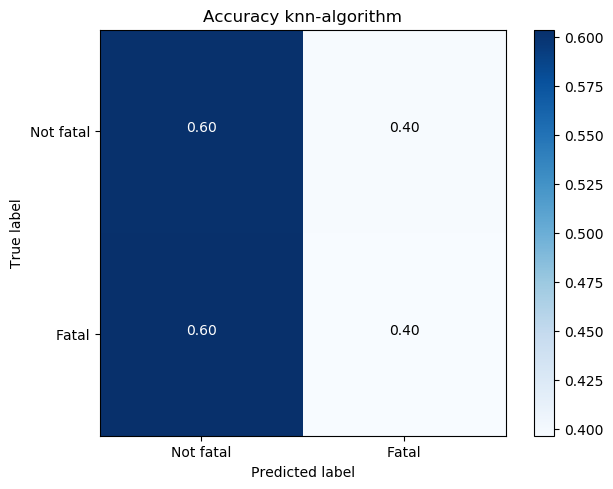

In [49]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)
mpl.style.use('default')
print (classification_report(y_test, yhat))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not fatal','Fatal'], title='Accuracy knn-algorithm')

# 7. Support Vector Machines

In [50]:
Cset = [0.01, 0.03, 0.1, 0.3, 1, 3, 10]
mean_acc = np.zeros(7)
for i in range(0,7):
    print('Training with C =', Cset[i])
    clf = svm.SVC(kernel='rbf', C=Cset[i])
    clf.fit(X_train, y_train) 
    yhat = clf.predict(X_eval)
    mean_acc[i] = metrics.accuracy_score(y_eval, yhat)
mean_acc

Training with C = 0.01


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training with C = 0.03


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training with C = 0.1


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training with C = 0.3


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training with C = 1


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training with C = 3


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training with C = 10


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([0.56, 0.61, 0.61, 0.62, 0.62, 0.62, 0.62])

In [51]:
mean_acc = np.zeros(7)
for i in range(0,7):
    print('Training with C =', Cset[i])
    clf = svm.SVC(kernel='sigmoid', C=Cset[i])
    clf.fit(X_train, y_train) 
    yhat = clf.predict(X_eval)
    mean_acc[i] = metrics.accuracy_score(y_eval, yhat)
mean_acc

Training with C = 0.01


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training with C = 0.03


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training with C = 0.1


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training with C = 0.3


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training with C = 1


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training with C = 3


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training with C = 10


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([0.6 , 0.6 , 0.56, 0.52, 0.52, 0.52, 0.52])

In [52]:
mean_acc = np.zeros(6)
for i in range(0,6):
    print('Training with C =', Cset[i])
    clf = svm.SVC(kernel='linear', C=Cset[i])
    clf.fit(X_train, y_train) 
    yhat = clf.predict(X_eval)
    mean_acc[i] = metrics.accuracy_score(y_eval, yhat)
mean_acc

Training with C = 0.01
Training with C = 0.03
Training with C = 0.1
Training with C = 0.3
Training with C = 1
Training with C = 3


array([0.6, 0.6, 0.6, 0.6, 0.6, 0.6])

In [53]:
clf = svm.SVC(kernel='rbf', C=1).fit(X_train, y_train)
yhat = clf.predict(X_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.63      0.77      0.69      2627
           1       0.64      0.48      0.55      2237

   micro avg       0.63      0.63      0.63      4864
   macro avg       0.64      0.62      0.62      4864
weighted avg       0.64      0.63      0.63      4864

Normalized confusion matrix


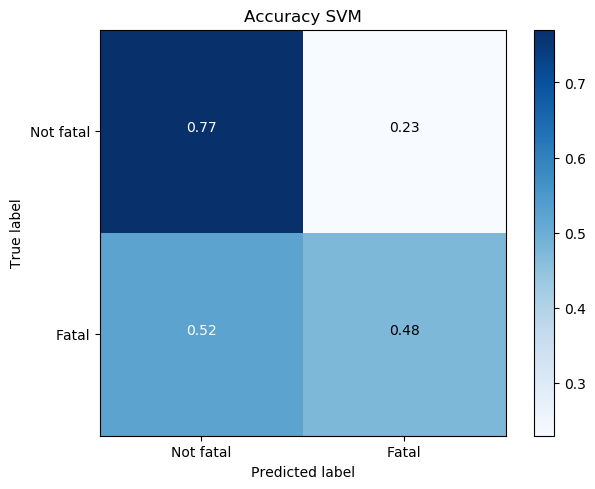

In [54]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)
mpl.style.use('default')
print (classification_report(y_test, yhat))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not fatal','Fatal'], title='Accuracy support vector machine')

# 8. Decision trees

In [57]:
mean_acc = np.zeros(20)
for i in range(0, 20):
    print('Training with depth', i+2)
    myTree = DecisionTreeClassifier(criterion="entropy", max_depth = i + 2)
    myTree.fit(X_train, y_train) 
    yhat = myTree.predict(X_eval)
    mean_acc[i] = metrics.accuracy_score(y_eval, yhat)
mean_acc

Training with depth 2
Training with depth 3
Training with depth 4
Training with depth 5
Training with depth 6
Training with depth 7
Training with depth 8
Training with depth 9
Training with depth 10
Training with depth 11
Training with depth 12
Training with depth 13
Training with depth 14
Training with depth 15
Training with depth 16
Training with depth 17
Training with depth 18
Training with depth 19
Training with depth 20
Training with depth 21


array([0.6 , 0.61, 0.61, 0.61, 0.61, 0.63, 0.63, 0.64, 0.64, 0.63, 0.62,
       0.62, 0.62, 0.61, 0.61, 0.61, 0.61, 0.61, 0.6 , 0.61])

In [58]:
myTree = DecisionTreeClassifier(criterion="entropy", max_depth = 9).fit(X_train, y_train) 
yhat = myTree.predict(X_test)

              precision    recall  f1-score   support

           0       0.65      0.74      0.69      2627
           1       0.64      0.53      0.58      2237

   micro avg       0.64      0.64      0.64      4864
   macro avg       0.64      0.64      0.64      4864
weighted avg       0.64      0.64      0.64      4864

Normalized confusion matrix


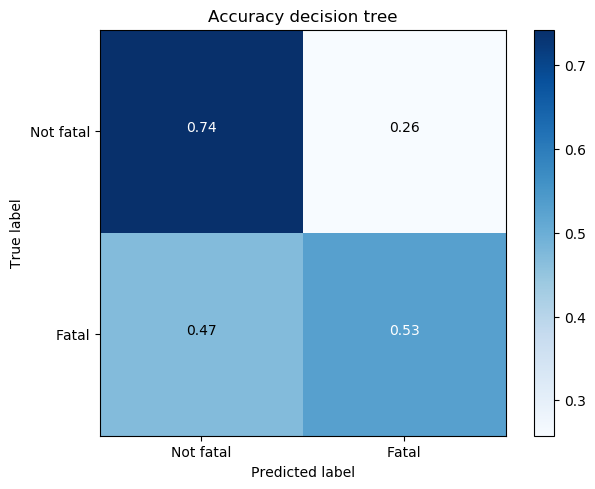

In [59]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)
mpl.style.use('default')
print (classification_report(y_test, yhat))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not fatal','Fatal'], title='Accuracy decision tree')

# 9. Logistic Regression

In [67]:
mean_acc = np.zeros(7)
logloss = np.zeros(7)
for i in range(0,7):
    print('Training with C =', Cset[i])
    LR = LogisticRegression(C=Cset[i], solver='liblinear').fit(X_train,y_train)
    LR.fit(X_train, y_train) 
    yhat = LR.predict(X_eval)
    yhat_pr = LR.predict_proba(X_test)
    mean_acc[i] = metrics.accuracy_score(y_eval, yhat)
    logloss[i] = log_loss(y_eval, yhat_pr)
print(mean_acc)
print(logloss)

Training with C = 0.01
Training with C = 0.03
Training with C = 0.1
Training with C = 0.3
Training with C = 1
Training with C = 3
Training with C = 10
[0.62 0.62 0.62 0.62 0.62 0.62 0.62]
[0.73 0.73 0.73 0.73 0.73 0.73 0.73]


In [86]:
mean_acc = np.zeros(7)
logloss = np.zeros(7)
for i in range(0,7):
    print('Training with C =', Cset[i])
    LR = LogisticRegression(C=Cset[i], solver='saga').fit(X_train,y_train)
    LR.fit(X_train, y_train) 
    yhat = LR.predict(X_eval)
    yhat_pr = LR.predict_proba(X_test)
    mean_acc[i] = metrics.accuracy_score(y_eval, yhat)
    logloss[i] = log_loss(y_eval, yhat_pr)
print(mean_acc)
print(logloss)

Training with C = 0.01
Training with C = 0.03
Training with C = 0.1


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Training with C = 0.3


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Training with C = 1


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Training with C = 3


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Training with C = 10


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[0.62 0.62 0.62 0.62 0.62 0.62 0.62]
[0.73 0.73 0.73 0.73 0.73 0.73 0.73]


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [84]:
mean_acc = np.zeros(7)
logloss = np.zeros(7)
for i in range(0,7):
    print('Training with C =', Cset[i])
    LR = LogisticRegression(C=Cset[i], solver='sag').fit(X_train,y_train)
    LR.fit(X_train, y_train) 
    yhat = LR.predict(X_eval)
    yhat_pr = LR.predict_proba(X_test)
    mean_acc[i] = metrics.accuracy_score(y_eval, yhat)
    logloss[i] = log_loss(y_eval, yhat_pr)
print(mean_acc)
print(logloss)

Training with C = 0.01
Training with C = 0.03
Training with C = 0.1
Training with C = 0.3


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Training with C = 1


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Training with C = 3


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Training with C = 10


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[0.62 0.62 0.62 0.62 0.62 0.62 0.62]
[0.73 0.73 0.73 0.73 0.73 0.73 0.73]


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [87]:
mean_acc = np.zeros(7)
logloss = np.zeros(7)
for i in range(0,7):
    print('Training with C =', Cset[i])
    LR = LogisticRegression(C=Cset[i], solver='newton-cg').fit(X_train,y_train)
    LR.fit(X_train, y_train) 
    yhat = LR.predict(X_eval)
    yhat_pr = LR.predict_proba(X_test)
    mean_acc[i] = metrics.accuracy_score(y_eval, yhat)
    logloss[i] = log_loss(y_eval, yhat_pr)
print(mean_acc)
print(logloss)

Training with C = 0.01
Training with C = 0.03
Training with C = 0.1
Training with C = 0.3
Training with C = 1
Training with C = 3
Training with C = 10
[0.62 0.62 0.62 0.62 0.62 0.62 0.62]
[0.73 0.73 0.73 0.73 0.73 0.73 0.73]


In [88]:
mean_acc = np.zeros(7)
logloss = np.zeros(7)
for i in range(0,7):
    print('Training with C =', Cset[i])
    LR = LogisticRegression(C=Cset[i], solver='lbfgs').fit(X_train,y_train)
    LR.fit(X_train, y_train) 
    yhat = LR.predict(X_eval)
    yhat_pr = LR.predict_proba(X_test)
    mean_acc[i] = metrics.accuracy_score(y_eval, yhat)
    logloss[i] = log_loss(y_eval, yhat_pr)
print(mean_acc)
print(logloss)

Training with C = 0.01
Training with C = 0.03
Training with C = 0.1
Training with C = 0.3
Training with C = 1
Training with C = 3
Training with C = 10
[0.62 0.62 0.62 0.62 0.62 0.62 0.62]
[0.73 0.73 0.73 0.73 0.73 0.73 0.73]


In [65]:
LR = LogisticRegression(C=1, solver='liblinear').fit(X_train, y_train) 
yhat = LR.predict(X_test)

              precision    recall  f1-score   support

           0       0.64      0.72      0.67      2627
           1       0.61      0.51      0.56      2237

   micro avg       0.63      0.63      0.63      4864
   macro avg       0.62      0.62      0.62      4864
weighted avg       0.62      0.63      0.62      4864

Normalized confusion matrix


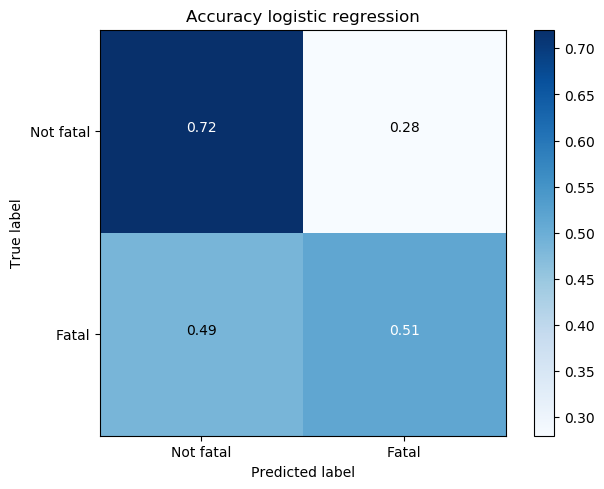

In [66]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)
mpl.style.use('default')
print (classification_report(y_test, yhat))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not fatal','Fatal'], title='Accuracy logistic regression')

In [69]:
logloss = log_loss(y_test, LR.predict_proba(X_test))
logloss

0.6425613405678718

# 10. Summary

In [74]:
test_yhat = [neigh.predict(X_test), myTree.predict(X_test), clf.predict(X_test), LR.predict(X_test)]
test_yhat_pr = LR.predict_proba(X_test)

In [79]:
report_df = pd.DataFrame ({'Algorithm':  ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression']}, columns = ['Algorithm'])

In [81]:
for i in range(report_df.shape[0]):
    report_df.at[i, 'Jaccard'] = jaccard_similarity_score(y_test, test_yhat[i])
    report_df.at[i, 'F1-score'] = f1_score(y_test, test_yhat[i])
report_df['LogLoss'] = ['NA', 'NA', 'NA', log_loss(y_test, test_yhat_pr)]

In [82]:
report_df

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.618421,0.552555,NA
1,Decision Tree,0.644326,0.577843,NA
2,SVM,0.634868,0.545315,NA
3,Logistic Regression,0.625411,0.557982,0.642561
